In [1]:
#EDA on titanic dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sns.set(style="whitegrid")

In [4]:
df=pd.read_csv("/Users/adityadhanrajsingh/Desktop/75_day_aiml_challenge/day2/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()
print("\n Missing Value:\n",df.isnull().sum())
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

 Missing Value:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


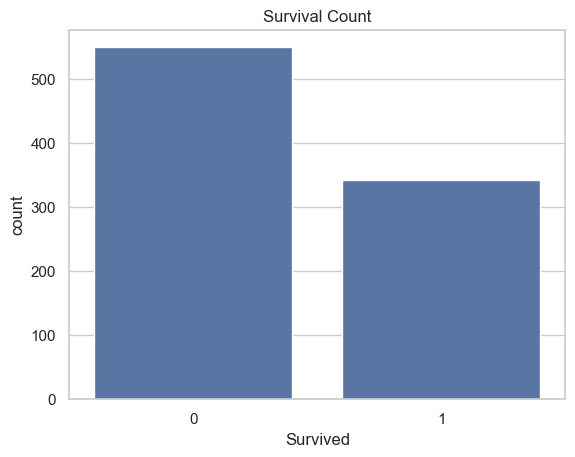

In [6]:
sns.countplot(x='Survived',data=df)
plt.title("Survival Count")
plt.show()

In [7]:
Survival_Rate=df['Survived'].value_counts(normalize=True)
print("\nSurvival Rate:\n",Survival_Rate)


Survival Rate:
 Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


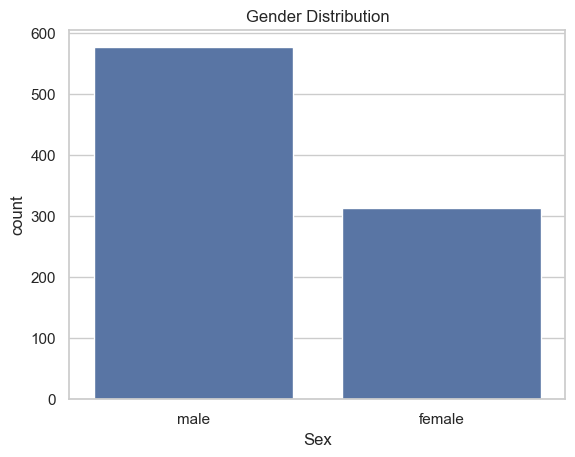

In [8]:
sns.countplot(x='Sex',data=df)
plt.title("Gender Distribution")
plt.show()

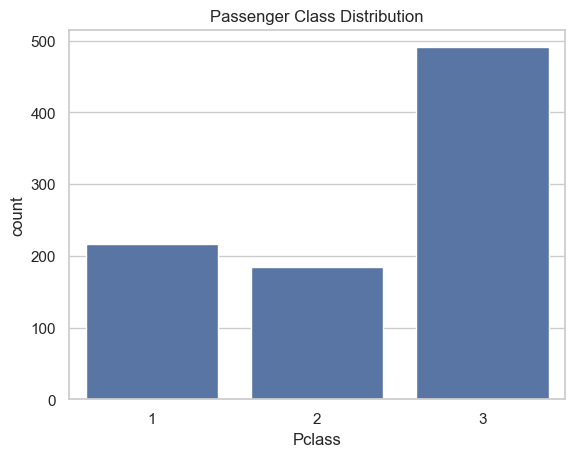

In [9]:
sns.countplot(x='Pclass',data=df)
plt.title("Passenger Class Distribution")
plt.show()

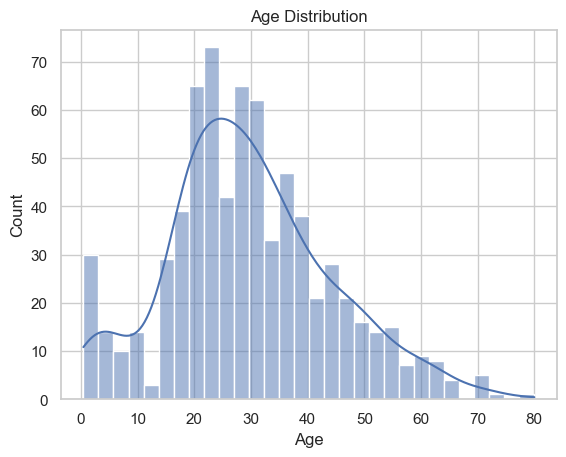

In [10]:
sns.histplot(df['Age'].dropna(),kde=True,bins=30)
plt.title("Age Distribution")
plt.show()

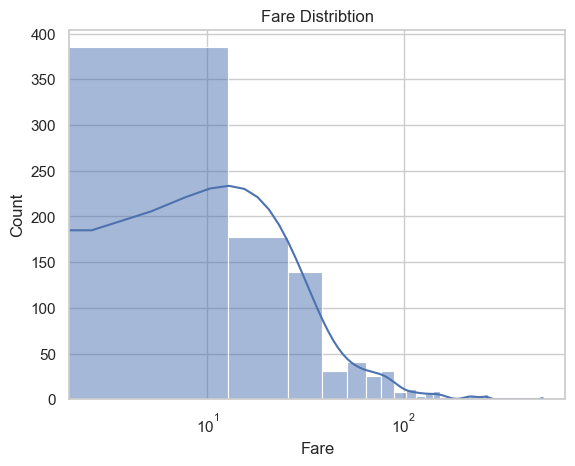

In [11]:
sns.histplot(df['Fare'],kde=True,bins=40)
plt.title("Fare Distribtion")
plt.xscale('log')
plt.show()

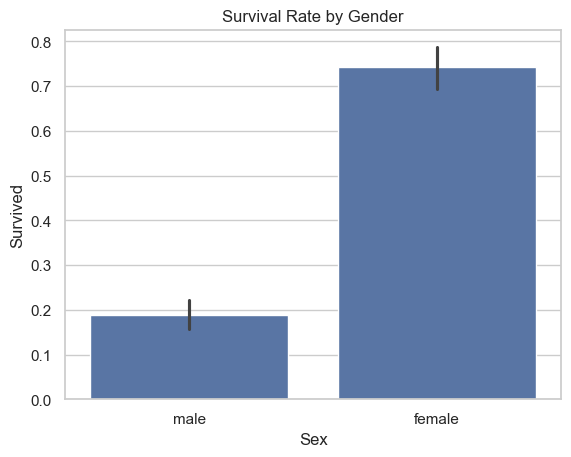

In [12]:
sns.barplot(x='Sex',y='Survived',data=df)
plt.title("Survival Rate by Gender")
plt.show()

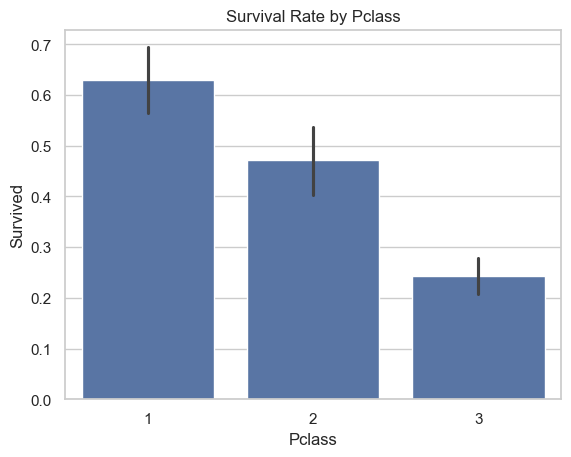

In [14]:
sns.barplot(x='Pclass',y='Survived',data=df)
plt.title("Survival Rate by Pclass")
plt.show()

In [15]:
df["FamilySize"]=df['SibSp']+df['Parch']+1
df['IsAlone']=(df['FamilySize']==1).astype(int)


In [16]:
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [17]:
df['Title']=df["Title"].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
                                 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title']=df['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})
df[['Name','Title','FamilySize','IsAlone']].head()

,Name,Title,FamilySize,IsAlone
0,"Braund, Mr. Owen Harris",Mr,2,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,2,0
2,"Heikkinen, Miss. Laina",Miss,1,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,2,0
4,"Allen, Mr. William Henry",Mr,1,1


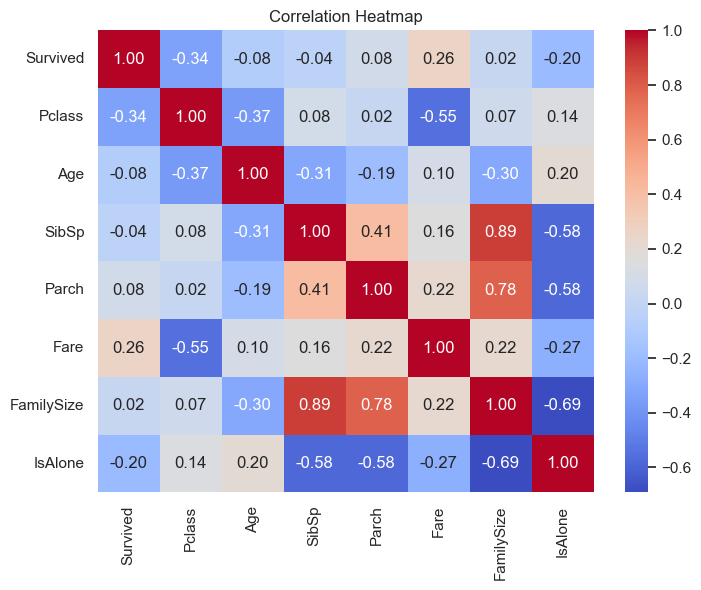

In [18]:
corr=df[['Survived','Pclass','Age','SibSp','Parch','Fare','FamilySize','IsAlone']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

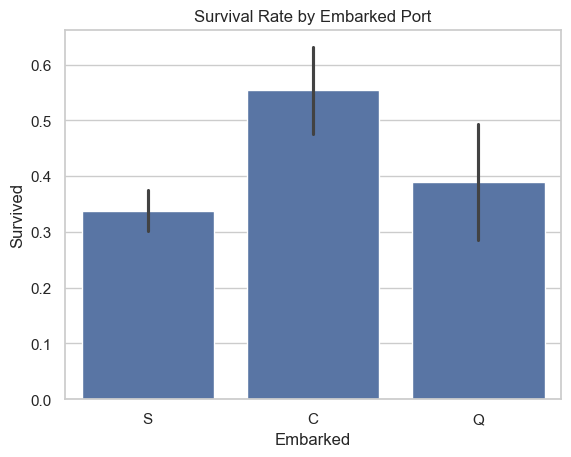

In [19]:
sns.barplot(x='Embarked',y='Survived',data=df)
plt.title("Survival Rate by Embarked Port")
plt.show()

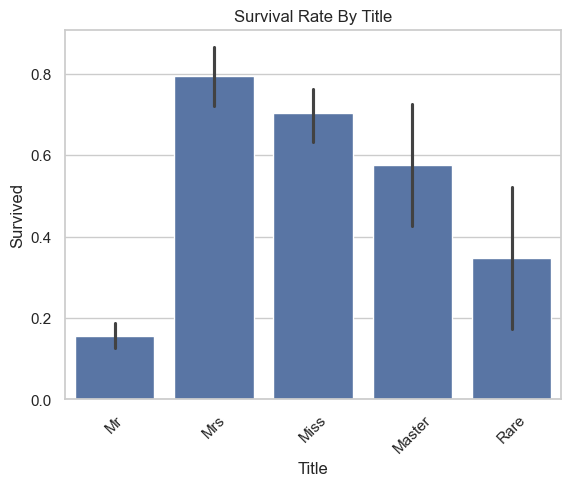

In [20]:
sns.barplot(x='Title',y='Survived',data=df)
plt.title("Survival Rate By Title")
plt.xticks(rotation=45)
plt.show()